In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from keras.utils import to_categorical


In [14]:
def load_data(file):
    return pd.read_csv(file)


In [99]:
def preprocess(df):
    numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
    num_pipeline = Pipeline(
        [("imputer", SimpleImputer(strategy="mean")), ("scaler", MinMaxScaler())]
    )

    # Combine transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", num_pipeline, numerical_features),
        ]
    )

    preprocessed_df = preprocessor.fit_transform(df)

    feature_names = preprocessor.get_feature_names_out()

    # Convert the preprocessed data back to a DataFrame with the feature names
    preprocessed_df = pd.DataFrame(preprocessed_df, columns=feature_names)
    return preprocessed_df


In [188]:
dataset = load_data("./covtype.csv")

In [189]:
dataset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [190]:
dataset.shape

(581012, 55)

In [191]:
dataset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [ ]:
target_labels = tf.keras.utils.to_categorical(dataset["Cover_Type"])
dataset = dataset.drop(columns="Cover_Type")
dataset = preprocess(dataset)


In [ ]:
target_labels = pd.DataFrame(target_labels)
target_labels = target_labels.drop(columns=0)
display(target_labels.shape)


(581012, 7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset, target_labels, test_size=0.2, random_state=42
)


In [196]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
input_size = X_train.shape[1]
print("nombre d'input = ", input_size)


(464809, 54)
(116203, 54)
(464809, 7)
(116203, 7)
nombre d'input =  54


In [197]:
model_parameters = {
    "epoch": 50,
    "batch_size": 1000,
    "validation_split": 0.1,
    "X_train": X_train,
    "y_train": y_train,
    "X_test": X_test,
    "y_test": y_test,
    "loss": "categorical_crossentropy",
    "optimizer": "adam",
    "metrics": ["accuracy"],
}


In [205]:
model = tf.keras.Sequential()
model.add(Dense(256, input_shape=(input_size,)))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(7, activation="softmax"))

model.compile(
    loss=model_parameters["loss"],
    optimizer=model_parameters["optimizer"],
    metrics=model_parameters["metrics"],
)
history = model.fit(
    model_parameters["X_test"],
    model_parameters["y_test"],
    epochs=model_parameters["epoch"],
    batch_size=model_parameters["batch_size"],
    validation_split=model_parameters["validation_split"],
)


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5425 - loss: 1.2253 - val_accuracy: 0.6783 - val_loss: 0.7526
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6981 - loss: 0.7191 - val_accuracy: 0.7020 - val_loss: 0.6900
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7200 - loss: 0.6691 - val_accuracy: 0.7124 - val_loss: 0.6722
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7269 - loss: 0.6508 - val_accuracy: 0.7168 - val_loss: 0.6582
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7293 - loss: 0.6402 - val_accuracy: 0.7241 - val_loss: 0.6441
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7355 - loss: 0.6225 - val_accuracy: 0.7369 - val_loss: 0.6205
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7415 - loss: 0.6066 - val_accuracy: 0.7400 - val_loss: 0.6114
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7459 - loss: 0.5990 - val_accu

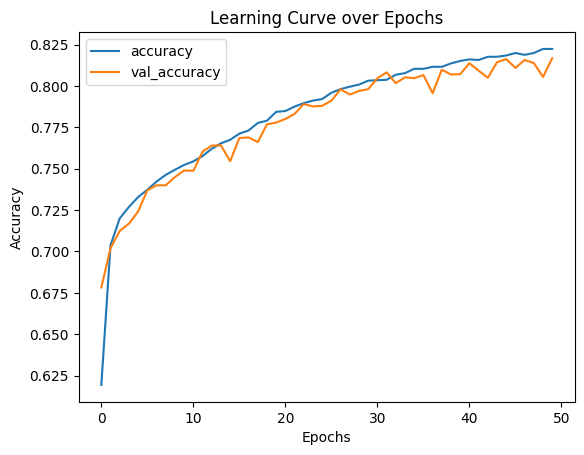

In [206]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Learning Curve over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy", "val_accuracy"], loc="upper left")
plt.show()


In [202]:
model.save("forest_classification.keras")

In [203]:
my_best_model = keras.models.load_model("./forest_classification.keras")

In [204]:
my_best_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,823 (206.34 KB)

 Trainable params: 17,607 (68.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,216 (137.57 KB)